It was once claimed 

```Alpha rhythms have nonzero power only at an alpha-band frequency and its higher harmonics```

However, this assumes the alpha rhythm is stationary, which is often not true in neural signals in which the oscillations are bursting and have variable amplitudes, periods, and shapes.

This notebook shows how changes in the rhythms affect the power spectra.

In [1]:
import numpy as np
import neurodsp

%matplotlib inline
import matplotlib.pyplot as plt

/Users/scott/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/scott/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
np.random.seed(0)

# 1. Effect of bursting changes on PSD
* More bursting: more broadband power
* Bursting to any extent will significantly increase non-harmonic power

In [3]:
freq = 10
T = 100
Fs = 1000

In [4]:
cycle_features_use = {'amp_mean': 1, 'amp_burst_std': 0, 'amp_std': 0,
                      'period_mean': 100,
                      'period_burst_std': 0,
                      'period_std': 0,
                      'rdsym_mean': .3, 'rdsym_burst_std': 0, 'rdsym_std': 0}
prob_leave_burst = .2

loop_prob_enter_burst = [.1, .5, 1]

In [5]:
loop_oscs = []
for p_enter in loop_prob_enter_burst:
    if p_enter == 1:
        p_leave = 0
    else:
        p_leave = prob_leave_burst
    osc = neurodsp.sim_bursty_oscillator(freq, T, Fs,
                                         cycle_features = cycle_features_use,
                                         prob_enter_burst=p_enter,
                                         prob_leave_burst=p_leave)
    loop_oscs.append(osc)

Text(0,0.5,'Voltage')

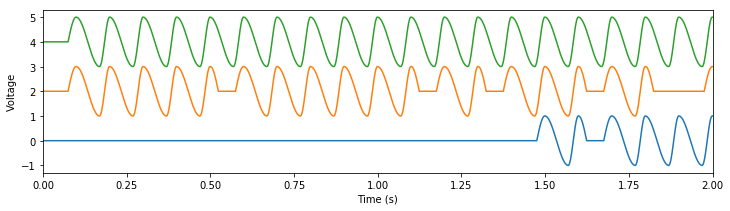

In [6]:
t = np.arange(0,T,1/Fs)
tidx = t <= 2
plt.figure(figsize=(12,3))
for i in range(len(loop_oscs)):
    plt.plot(t[tidx], loop_oscs[i][tidx] + i*2)
plt.xlim((0,2))
plt.xlabel('Time (s)')
plt.ylabel('Voltage')

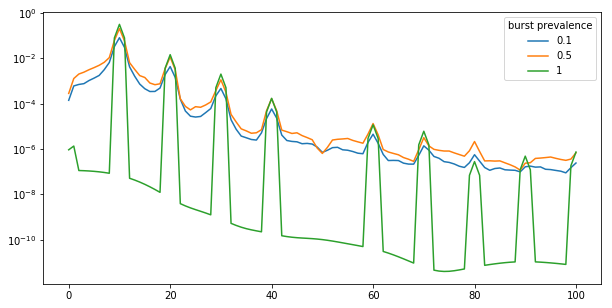

In [7]:
fs, psds = [], []
for i in range(len(loop_oscs)):
    f, psd = neurodsp.spectral.psd(loop_oscs[i], Fs)
    fs.append(f)
    psds.append(psd)

plt.figure(figsize=(10,5))
for i in range(len(loop_oscs)):
    fidx = fs[i] <= 100
    plt.semilogy(fs[i][fidx], psds[i][fidx],
                 label=loop_prob_enter_burst[i])
plt.legend(title='burst prevalence')

# 2. Effect of period changes on PSD

In [8]:
freq = 10
T = 100
Fs = 1000

In [9]:
cycle_features_use = {'amp_mean': 1, 'amp_burst_std': 0, 'amp_std': 0,
                      'period_mean': 100,
                      'period_burst_std': 0,
                      'period_std': None,
                      'rdsym_mean': .3, 'rdsym_burst_std': 0, 'rdsym_std': 0}
prob_enter_burst = 1
prob_leave_burst = 0

loop_period_stds = [0, 3, 15]

In [10]:
loop_oscs = []
for per_std in loop_period_stds:
    cycle_features_use['period_std'] = per_std
    osc = neurodsp.sim_bursty_oscillator(freq, T, Fs,
                                         cycle_features = cycle_features_use,
                                         prob_enter_burst=prob_enter_burst,
                                         prob_leave_burst=prob_leave_burst)
    loop_oscs.append(osc)

Text(0,0.5,'Voltage')

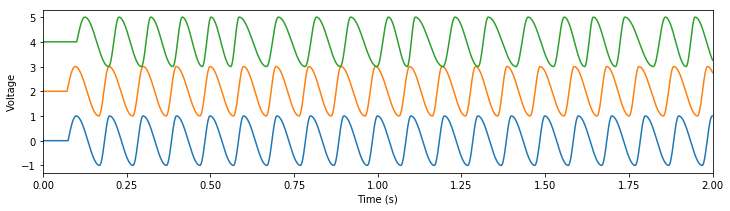

In [11]:
t = np.arange(0,T,1/Fs)
tidx = t <= 2
plt.figure(figsize=(12,3))
for i in range(len(loop_oscs)):
    plt.plot(t[tidx], loop_oscs[i][tidx] + i*2)
plt.xlim((0,2))
plt.xlabel('Time (s)')
plt.ylabel('Voltage')

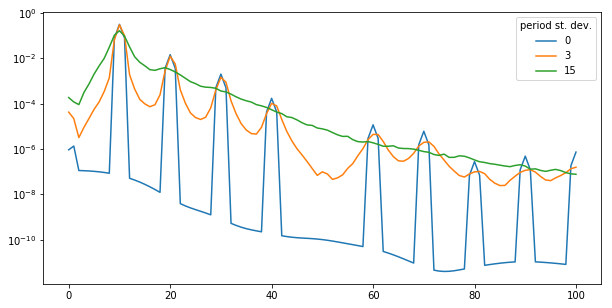

In [12]:
fs, psds = [], []
for i in range(len(loop_oscs)):
    f, psd = neurodsp.spectral.psd(loop_oscs[i], Fs)
    fs.append(f)
    psds.append(psd)

plt.figure(figsize=(10,5))
for i in range(len(loop_oscs)):
    fidx = fs[i] <= 100
    plt.semilogy(fs[i][fidx], psds[i][fidx],
                 label=loop_period_stds[i])
plt.legend(title='period st. dev.')

# 3. Effect of symmetry changes on PSD

In [13]:
cycle_features_use = {'amp_mean': 1, 'amp_burst_std': 0, 'amp_std': 0,
                      'period_mean': 100,
                      'period_burst_std': 0,
                      'period_std': 0,
                      'rdsym_mean': .3, 'rdsym_burst_std': 0, 'rdsym_std': None}
prob_enter_burst = 1
prob_leave_burst = 0

loop_rdsym_stds = [0, .01, .07]

In [14]:
loop_oscs = []
for rdsym_std in loop_rdsym_stds:
    cycle_features_use['rdsym_std'] = rdsym_std
    osc = neurodsp.sim_bursty_oscillator(freq, T, Fs,
                                         cycle_features = cycle_features_use,
                                         prob_enter_burst=prob_enter_burst,
                                         prob_leave_burst=prob_leave_burst)
    loop_oscs.append(osc)

Text(0,0.5,'Voltage')

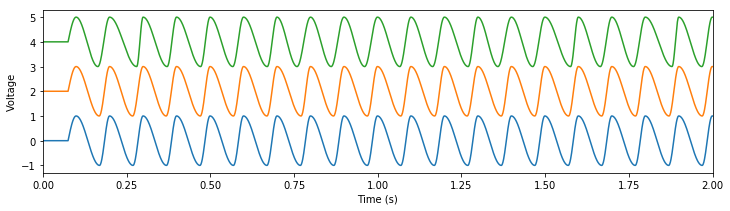

In [15]:
t = np.arange(0,T,1/Fs)
tidx = t <= 2
plt.figure(figsize=(12,3))
for i in range(len(loop_oscs)):
    plt.plot(t[tidx], loop_oscs[i][tidx] + i*2)
plt.xlim((0,2))
plt.xlabel('Time (s)')
plt.ylabel('Voltage')

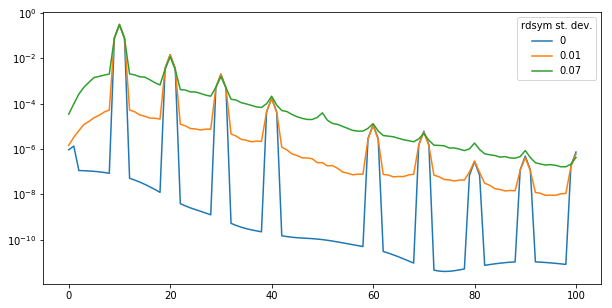

In [16]:
fs, psds = [], []
for i in range(len(loop_oscs)):
    f, psd = neurodsp.spectral.psd(loop_oscs[i], Fs)
    fs.append(f)
    psds.append(psd)

plt.figure(figsize=(10,5))
for i in range(len(loop_oscs)):
    fidx = fs[i] <= 100
    plt.semilogy(fs[i][fidx], psds[i][fidx],
                 label=loop_rdsym_stds[i])
plt.legend(title='rdsym st. dev.')